# Learning NumPy

In [4]:
import numpy as np
a = np.array([0, 1, 2, 3, 4, 5])
a

array([0, 1, 2, 3, 4, 5])

In [5]:
a.ndim

1

In [6]:
a.shape

(6,)

We just created an array like we would create a list in Python. However, the NumPy arrays have additional information about the shape. In this case, it is a one-dimensional array of six elements. 

We can now transform this array to a two-dimensional matrix:

In [7]:
b = a.reshape((3, 2))
b

array([[0, 1],
       [2, 3],
       [4, 5]])

In [8]:
b.ndim

2

In [9]:
b.shape

(3, 2)

We have a trouble if we wan't to make a real copy, this shows how much the NumPy package is optimized.

In [10]:
b[1][0] = 77
b

array([[ 0,  1],
       [77,  3],
       [ 4,  5]])

But now if we see the values of a:

In [11]:
a

array([ 0,  1, 77,  3,  4,  5])

We see immediately the same change reflected in "a" as well. If we need a true copy we can perform:

In [12]:
c = a.reshape((3, 2)).copy()
c

array([[ 0,  1],
       [77,  3],
       [ 4,  5]])

In [13]:
c[0][0] = -99
a

array([ 0,  1, 77,  3,  4,  5])

In [14]:
c

array([[-99,   1],
       [ 77,   3],
       [  4,   5]])

Another big advantage of NumPy arrays is that operations are propagated to the individual elements. 

In [15]:
d = np.array([1,2,3,4,5])
d*2

array([ 2,  4,  6,  8, 10])

Similarly, for other operations:

In [16]:
d**2

array([ 1,  4,  9, 16, 25])

What it's not the case with Python lists. 

In [17]:
[1,2,3,4,5]*2

[1, 2, 3, 4, 5, 1, 2, 3, 4, 5]

In [18]:
[1,2,3,4,5]**2

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

When using NumPy arrays, we sacrafice the agility Python lists offer. Simple operations such as adding or removing are bit complex for NumPy arrays. But we can choose the right tool for the task.

## Indexing
Numpy allows you to use the arrays themselves as indices by performing:

In [ ]:
a[np.array([2,3,4])]

And with the fact that conditions are also propagated to individual elements, we gain a very convenient way to access our data:

In [19]:
a>4

array([False, False,  True, False, False,  True], dtype=bool)

In [20]:
a[a>4]

array([77,  5])

We can use this feature to trim outliers:

In [ ]:
a[a>4] = 4
a

This is a common use case, so there is a special clip function for it, clipping values at both ends of an interval with one function call:

In [ ]:
a.clip(0, 4)

## Handling nonexisting values
The power of NumPy's indexing capabilities comes in handy when preprocessing data that we have just read in from a text file. Most likely, that will contain invalid values that we will mark as not being a real number using numpy.NAN

In [21]:
c = np.array([1,2,np.NAN,3,4]) # fake data
np.isnan(c)

array([False, False,  True, False, False], dtype=bool)

In [ ]:
c[~np.isnan(c)]

In [ ]:
np.mean(c[~np.isnan(c)])

## Comparing the runtime
Let's compare the runtime behavior of NumPy compared with normal Python lists. In the following code, we will calculate the sum of all squared numbers from 1 to 1000 and see how much time it will take.

In [22]:
import timeit
normal_py_sec = timeit.timeit('sum(x*x for x in range(1000))', number=10000)
naive_np_sec = timeit.timeit('sum(na*na)', setup="import numpy as np; na=np.arange(1000)",
                             number=10000)
good_np_sec = timeit.timeit('na.dot(na)', setup="import numpy as np; na=np.arange(1000)",
                           number=10000)

print("Normal Python: %f sec" % normal_py_sec)
print("Naive NumPy: %f sec" %naive_np_sec)
print("Good NumPy: %f sec" % good_np_sec)

Normal Python: 3.576253 sec
Naive NumPy: 4.167665 sec
Good NumPy: 0.069332 sec


There are some interesting observations:
* Using NumPy as data storage takes more time, which is surprising since we believe it must be much faster as it is written as a C extension. But the explanation is on the access to individual elements from Python itself is rather costly. 
* The dot() function does exactly the same thing

However we no longer have the incredible flexibility of Python lists, wich can hold basically anything. NumPy arrays always have only one data type.

In [23]:
a = np.array([1,2,3])
a.dtype

dtype('int64')

If we try to use elements of different types, shuch as the ones shown in the following code, NumPy will do its best to coerce them to be the most reasonable common data type:

In [24]:
np.array([1, "stringy"])

array(['1', 'stringy'], 
      dtype='<U21')

In [25]:
np.array([1, "stringy", set([1,2,3])])

array([1, 'stringy', {1, 2, 3}], dtype=object)

# Learning SciPy
On top of the efficient data structures of NumPy, SciPy offers a magnitude of algorithms working on those arrays. Whatever numerical heavy algorithm you take from current books, on numerical recipes, most likely you will find support for them in SciPy on one way or the other. For convenience, the complete namespace of NumPy is also accessible via SciPy. You can check this easily comparing the function references of any base function, such as:

In [ ]:
import scipy, numpy
scipy.version.full_version

In [ ]:
scipy.dot is numpy.dot

# Our first (tiny) application of machine learning
Let's get our hands dirty and take a look at our hypothetical web start-up, MLaaS,
which sells the service of providing machine learning algorithms via HTTP. With
increasing success of our company, the demand for better infrastructure increases
to serve all incoming web requests successfully. We don't want to allocate too
many resources as that would be too costly. On the other side, we will lose money,
if we have not reserved enough resources to serve all incoming requests. Now,
the question is, when will we hit the limit of our current infrastructure, which we
estimated to be at 100,000 requests per hour. We would like to know in advance
when we have to request additional servers in the cloud to serve all the incoming
requests successfully without paying for unused ones.

## Reading in the data
We have collected the web stats for the last month and aggregated them in ch01/
data/web_traffic.tsv ( .tsv because it contains tab-separated values). They are
stored as the number of hits per hour. Each line contains the hour consecutively and
the number of web hits in that hour.
Using gentfromtxt(), we can easily read in the data using the following code:

In [1]:
import scipy as sp
data = sp.genfromtxt("data/web_traffic.tsv", delimiter="\t")

We have to specify tab as the delimiter so that columns are correctly determined. A quick check shows that we have correctly read in the data:

In [2]:
print(data[:10])

[[  1.00000000e+00   2.27200000e+03]
 [  2.00000000e+00              nan]
 [  3.00000000e+00   1.38600000e+03]
 [  4.00000000e+00   1.36500000e+03]
 [  5.00000000e+00   1.48800000e+03]
 [  6.00000000e+00   1.33700000e+03]
 [  7.00000000e+00   1.88300000e+03]
 [  8.00000000e+00   2.28300000e+03]
 [  9.00000000e+00   1.33500000e+03]
 [  1.00000000e+01   1.02500000e+03]]


In [3]:
print(data.shape)

(743, 2)


As you can see, we have 743 data points with two dimensions.

## Preprocessing and cleaning the data
It is more convenient for SciPy to separate the dimensions into two vectors, each
of size 743. The first vector, x , will contain the hours, and the other, y , will contain
the Web hits in that particular hour. This splitting is done using the special index
notation of SciPy, by which we can choose the columns individually:

In [4]:
x = data[:,0]
y = data[:,1]

Let's check how many hours contain invalid
data, by running the following code:

In [5]:
sp.sum(sp.isnan(y))

8

As you can see, we are missing only 8 out of 743 entries, so we can afford to remove
them.

In [6]:
x = x[~sp.isnan(y)]
y = y[~sp.isnan(y)]

We can plot our data using matplotlib which contains the pyplot package, wich tries to mimic MATLAB's interface, which is very convenient and easy to use as you can see in the following code:

In [8]:
%matplotlib inline

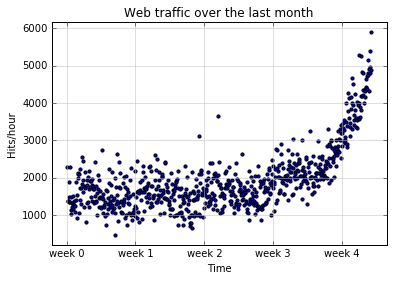

In [9]:
import matplotlib.pyplot as plt
# plot the (x,y) points with dots of size 10
plt.scatter(x,y, s=10)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)],
          ['week %i' % w for w in range(10)])
plt.autoscale(tight=True)
# draw a slightly opaque, dashed grid
plt.grid(True, linestyle='-', color='0.75')
plt.show()

## Choosing the right model and learning algorithm
Now that we have a first impression of the data, we return to the initial question:
How long will our server handle the incoming web traffic? To answer this we have
to do the following:
1. Find the real model behind the noisy data points.
2. Following this, use the model to extrapolate into the future to find the point in time where our infrastructure has to be extended.

## Before building our first model...
When we talk about models, you can think of them as simplified theoretical
approximations of complex reality. As such there is always some inferiority
involved, also called the approximation error. This error will guide us in choosing
the right model among the myriad of choices we have. And this error will be
calculated as the squared distance of the model's prediction to the real data; for
example, for a learned model function f , the error is calculated as follows:

In [10]:
def error(f, x, y):
    return sp.sum((f(x)-y)**2)

The vectors x and y contain the web stats data that we have extracted earlier. It is
the beauty of SciPy's vectorized functions that we exploit here with f(x) . The trained
model is assumed to take a vector and return the results again as a vector of the same
size so that we can use it to calculate the difference to y .

## Starting with a simple straight line

Let's assume for a second that the underlying model is a straight line. Then the
challenge is how to best put that line into the chart so that it results in the smallest
approximation error. SciPy's polyfit() function does exactly that. Given data x and
y and the desired order of the polynomial (a straight line has order 1), it finds the
model function that minimizes the error function defined earlier:

In [12]:
fp1, residuals, rank, sv, rcond = sp.polyfit(x, y, 1, full=True)

The polyfit() function returns the parameters of the fitted model function, fp1 .
And by setting full=True , we also get additional background information on the
fitting process. Of this, only residuals are of interest, which is exactly the error of
the approximation:

In [13]:
print("Model parameters: %s" % fp1)

Model parameters: [   2.59619213  989.02487106]


In [14]:
print(residuals)

[  3.17389767e+08]


This means the best straight line fit is the following function
f(x) = 2.59619213 * x + 989.02487106
We then use poly1d() to create a model function from the model parameters:

In [15]:
f1 = sp.poly1d(fp1)
print(error(f1, x, y))

317389767.34


We have used full=True to retrieve more details on the fitting process. Normally,
we would not need it, in which case only the model parameters would be returned.
We can now use f1() to plot our first trained model. In addition to the preceding
plotting instructions, we simply add the following code:

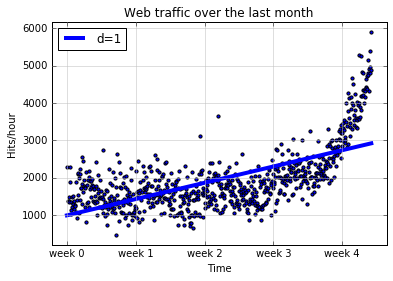

In [17]:
import matplotlib.pyplot as plt
# plot the (x,y) points with dots of size 10
plt.scatter(x,y, s=10)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)],
          ['week %i' % w for w in range(10)])
plt.autoscale(tight=True)
# draw a slightly opaque, dashed grid
plt.grid(True, linestyle='-', color='0.75')
fx = sp.linspace(0,x[-1], 1000) # generate values for plotting
plt.plot(fx, f1(fx), linewidth=4)
plt.legend(["d=%i" % f1.order], loc="upper left")
plt.show()

It seems like the first 4 weeks are not that far off, although we clearly see that there is
something wrong with our initial assumption that the underlying model is a straight
line. The absolute value of the error is seldom of use in isolation. However, when
comparing two competing models, we can use their errors to judge which one of
them is better. Although our first model clearly is not the one we would use, it serves
a very important purpose in the workflow. We will use it as our baseline until we
find a better one. Whatever model we come up with in the future, we will compare it
against the current baseline.

## Towards some advanced stuff
Let's now fit a more complex model, a polynomial of degree 2, to see whether it
better understands our data:

In [22]:
f2p = sp.polyfit(x, y, 2)
print(f2p)


[  1.05322215e-02  -5.26545650e+00   1.97476082e+03]


In [23]:
f2 = sp.poly1d(f2p)
print(error(f2, x, y))

179983507.878


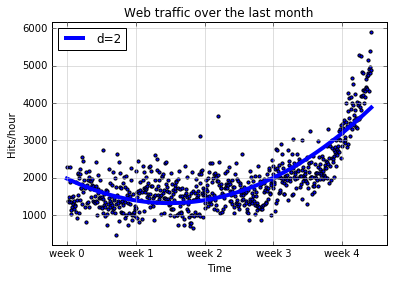

In [24]:
import matplotlib.pyplot as plt
# plot the (x,y) points with dots of size 10
plt.scatter(x,y, s=10)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)],
          ['week %i' % w for w in range(10)])
plt.autoscale(tight=True)
# draw a slightly opaque, dashed grid
plt.grid(True, linestyle='-', color='0.75')
fx = sp.linspace(0,x[-1], 1000) # generate values for plotting
plt.plot(fx, f2(fx), linewidth=4)
plt.legend(["d=%i" % f2.order], loc="upper left")
plt.show()

The error is 179,983,507.878, which is almost half the error of the straight line model.
This is good but unfortunately this comes with a price: We now have a more complex
function, meaning that we have one parameter more to tune inside polyfit() . The
fitted polynomial is as follows:

 f(x) = 0.0105322215 * x**2 - 5.26545650 * x + 1974.76082
 

So, if more complexity gives better results, why not increase the complexity even
more? Let's try it for degrees 3, 10, and 100.

In [26]:
f3p = sp.polyfit(x, y, 3)
print(f3p)
f3 = sp.poly1d(f3p)

[  3.04960132e-05  -2.35893797e-02   4.94226019e+00   1.33328797e+03]


In [27]:
f10p = sp.polyfit(x, y, 10)
print(f10p)
f10 = sp.poly1d(f10p)

[ -3.73981969e-22   1.36473757e-18  -2.14294406e-15   1.89884971e-12
  -1.04570108e-09   3.70867731e-07  -8.45604588e-05   1.19167041e-02
  -9.41618606e-01   3.33703840e+01   1.26421204e+03]


In [28]:
f100p = sp.polyfit(x, y, 100)
print(f100p)
f100 = sp.poly1d(f100p)

[  0.00000000e+000  -0.00000000e+000  -0.00000000e+000  -0.00000000e+000
  -0.00000000e+000  -0.00000000e+000   0.00000000e+000   0.00000000e+000
  -0.00000000e+000   0.00000000e+000  -0.00000000e+000  -0.00000000e+000
  -0.00000000e+000  -0.00000000e+000  -0.00000000e+000   0.00000000e+000
  -0.00000000e+000   0.00000000e+000  -0.00000000e+000   0.00000000e+000
  -0.00000000e+000   0.00000000e+000   0.00000000e+000  -0.00000000e+000
  -0.00000000e+000   0.00000000e+000   0.00000000e+000  -0.00000000e+000
  -0.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
   0.00000000e+000  -0.00000000e+000  -0.00000000e+000  -0.00000000e+000
  -0.00000000e+000  -0.00000000e+000  -0.00000000e+000  -0.00000000e+000
  -0.00000000e+000  -0.00000000e+000  -0.00000000e+000  -0.00000000e+000
  -0.00000000e+000  -0.00000000e+000  -0.00000000e+000  -6.72740876e-140
   1.19703798e-136  -4.65838939e-135  -4.66478146e-131  -2.54255458e-128
   2.25979033e-126   1.39011706e-122   1.16111764e-

/home/maritza/Documentos/tesis_resources/machine_learning/ENV/lib/python3.4/site-packages/numpy/lib/polynomial.py:587: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/home/maritza/Documentos/tesis_resources/machine_learning/ENV/lib/python3.4/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


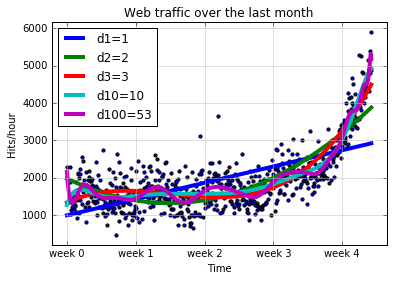

In [37]:
import matplotlib.pyplot as plt
# plot the (x,y) points with dots of size 10
plt.scatter(x,y, s=10)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)],
          ['week %i' % w for w in range(10)])
plt.autoscale(tight=True)
# draw a slightly opaque, dashed grid
plt.grid(True, linestyle='-', color='0.75')
fx = sp.linspace(0,x[-1], 1000) # generate values for plotting
# plotting with a 1 order
plt.plot(fx, f1(fx), linewidth=4, label="d1=%i" % f1.order)
# plotting with a 2 order
plt.plot(fx, f2(fx), linewidth=4, label="d2=%i" % f2.order)

# plotting with a 3 order
plt.plot(fx, f3(fx), linewidth=4, label="d3=%i" % f3.order)

# plotting with a 10 order
plt.plot(fx, f10(fx), linewidth=4, label="d10=%i" % f10.order)

# plotting with a 100 order
plt.plot(fx, f100(fx), linewidth=4, label="d100=%i" % f100.order)
plt.legend(loc='upper left')
plt.show()

Interestingly, when you have plotted your graph that d100=53 this means that polyfit cannot determine a good fit with 100 degrees. Instead, it figured that 53 must be good enough. It seems like the curves capture and better the fitted data the more complex they get.
And also, the errors seem to tell the same story:

In [39]:
print("Error d=1: %f", error(f1, x, y))
print("Error d=2: %f", error(f2, x, y))
print("Error d=3: %f", error(f3, x, y))
print("Error d=10: %f", error(f10, x, y))
print("Error d=100: %f", error(f100, x, y))

Error d=1: %f 317389767.34
Error d=2: %f 179983507.878
Error d=3: %f 139350144.032
Error d=10: %f 121942326.364
Error d=100: %f 109452401.18


However, taking a closer look at the fitted curves, we start to wonder whether they also
capture the true process that generated that data. Framed differently, do our models
correctly represent the underlying mass behavior of customers visiting our website?
Looking at the polynomial of degree 10 and 53, we see wildly oscillating behavior. It
seems that the models are fitted too much to the data. So much that it is now capturing
not only the underlying process but also the noise. This is called overfitting.

So we have the following choices:
* Choosing one of the fitted polynomial models.
* Switching to another more complex model class.
* Thinking differently about the data and start again.

Out of the five fitted models, the first order model clearly is too simple, and the
models of order 10 and 53 are clearly overfitting. Only the second and third order
models seem to somehow match the data. However, if we extrapolate them at both
borders, we see them going berserk.
Switching to a more complex class seems also not to be the right way to go. What
arguments would back which class? At this point, we realize that we probably have
not fully understood our data.

## Stepping back to go forward – another look at our data
So, we step back and take another look at the data. It seems that there is an inflection point between weeks 3 and 4. So let's separate the data and train two lines using week 3.5 as a separation point:

In [49]:
inflection = 3.5*7*25 #calculate the inflection point in hours
int_inflection = round(inflection)
xa = x[:int_inflection] # data before the inflection point
ya = y[:int_inflection]
xb = x[int_inflection:] # data after
yb = y[int_inflection:]

fa = sp.poly1d(sp.polyfit(xa, ya, 1))
fb = sp.poly1d(sp.polyfit(xb, yb, 1))

fa_error = error(fa, xa, ya)
fb_error = error(fb, xb, yb)
print("Error inflection=%f" %(fa_error + fb_error))

Error inflection=132246076.860267


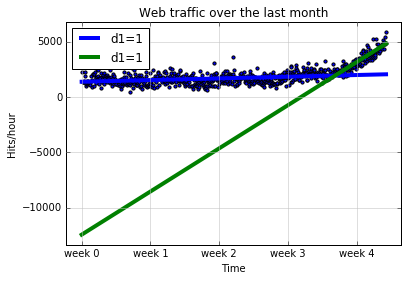

In [53]:
import matplotlib.pyplot as plt
# plot the (x,y) points with dots of size 10
plt.scatter(x,y, s=10)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)],
          ['week %i' % w for w in range(10)])
plt.autoscale(tight=True)
# draw a slightly opaque, dashed grid
plt.grid(True, linestyle='-', color='0.75')
fx = sp.linspace(0,x[-1], 1000) # generate values for plotting
# plotting with a 1 order
plt.plot(fx, fa(fx), linewidth=4, label="d1=%i" % fa.order)
# plotting with a 2 order
plt.plot(fx, fb(fx), linewidth=4, label="d1=%i" % fb.order)

plt.legend(loc='upper left')
plt.show()

Clearly, the combination of these two lines seems to be a much better fit to the data
than anything we have modeled before. But still, the combined error is higher than
the higher order polynomials. Can we trust the error at the end?

Asked differently, why do we trust the straight line fitted only at the last week of our
data more than any of the more complex models? It is because we assume that it will
capture future data better. If we plot the models into the future, we see how right we
are (d=1 is again our initial straight line).

## Training and testing
If we only had some data from the future that we could use to measure our models
against, then we should be able to judge our model choice only on the resulting
approximation error.
Although we cannot look into the future, we can and should simulate a similar effect
by holding out a part of our data. Let's remove, for instance, a certain percentage of
the data and train on the remaining one. Then we used the held-out data to calculate
the error. As the model has been trained not knowing the held-out data, we should
get a more realistic picture of how the model will behave in the future.
The test errors for the models trained only on the time after inflection point now
show a completely different picture:

In [64]:
inflection = 3.5*7*25 #calculate the inflection point in hours
int_inflection = inflection

xb = x[int_inflection:] # data after
yb = y[int_inflection:]

fb1 = sp.poly1d(sp.polyfit(xb, yb, 1))
fb2 = sp.poly1d(sp.polyfit(xb, yb, 2))
fb3 = sp.poly1d(sp.polyfit(xb, yb, 3))
fb10 = sp.poly1d(sp.polyfit(xb, yb, 10))
fb53 = sp.poly1d(sp.polyfit(xb, yb, 53))

fb1_error = error(fb1, xb, yb)
fb2_error = error(fb2, xb, yb)
fb3_error = error(fb3, xb, yb)
fb10_error = error(fb10, xb, yb)
fb53_error = error(fb53, xb, yb)

frac = 0.3
split_idx = int(frac * len(xb))
shuffled = sp.random.permutation(list(range(len(xb))))
test = sorted(shuffled[:split_idx])
train = sorted(shuffled[split_idx:])
fbt1 = sp.poly1d(sp.polyfit(xb[train], yb[train], 1))
fbt2 = sp.poly1d(sp.polyfit(xb[train], yb[train], 2))
fbt3 = sp.poly1d(sp.polyfit(xb[train], yb[train], 3))
fbt10 = sp.poly1d(sp.polyfit(xb[train], yb[train], 10))
fbt100 = sp.poly1d(sp.polyfit(xb[train], yb[train], 53))

print("Test errors for only the time after inflection point")
for f in [fbt1, fbt2, fbt3, fbt10, fbt100]:
    print("Error d=%i: %f" % (f.order, error(f, xb[test], yb[test])))

Test errors for only the time after inflection point
Error d=1: 3946251.726017
Error d=2: 3873979.021186
Error d=3: 3883897.384542
Error d=10: 4038394.035316
Error d=53: 4437453.980905


/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/maritza/Documentos/tesis_resources/machine_learning/ENV/lib/python3.4/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/home/maritza/Documentos/tesis_resources/machine_learning/ENV/lib/python3.4/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/home/maritza/Documentos/tesis_resources/machine_learning/ENV/lib/python3.4/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/home/maritza/Documentos/tesis_resources/mac

It seems that we finally have a clear winner: The model with degree 2 has the lowest
test error, which is the error when measured using data that the model did not see
during training. And this gives us hope that we won't get bad surprises when future
data arrives

## Answering our initial question
Finally we have arrived at a model which we think represents the underlying
process best; it is now a simple task of finding out when our infrastructure will
reach 100,000 requests per hour. We have to calculate when our model function
reaches the value 100,000.
Having a polynomial of degree 2, we could simply compute the inverse of the
function and calculate its value at 100,000. Of course, we would like to have an
approach that is applicable to any model function easily.
This can be done by subtracting 100,000 from the polynomial, which results in
another polynomial, and finding its root. SciPy's optimize module has the function
fsolve that achieves this, when providing an initial starting position with parameter
x0 . As every entry in our input data file corresponds to one hour, and we have 743 of
them, we set the starting position to some value after that. Let fbt2 be the winning
polynomial of degree 2.

In [65]:
fbt2 = sp.poly1d(sp.polyfit(xb[train], yb[train], 2))
print("fbt2(x) = \n%s" %fbt2)

fbt2(x) = 
         2
0.07935 x - 84.72 x + 2.42e+04


In [66]:
print("fbt2(x)-100,000 = \n%s" %(fbt2-100000))

fbt2(x)-100,000 = 
         2
0.07935 x - 84.72 x - 7.58e+04


In [67]:
from scipy.optimize import fsolve
reached_max = fsolve(fbt2-100000, x0=800)/(7*24)
print("100,000 hits/hour expected at week %f" % reached_max[0])

100,000 hits/hour expected at week 9.806430


so our model tells
us that, given the current user behavior and traction of our start-up, it will
take another month until we have reached our capacity threshold.